In [1]:
from pylab import contour, cm
import numpy as np
import matplotlib.pyplot as plt
from methods import grad_desc, coord_desc, proj_desc
%matplotlib inline

In [2]:
np.random.seed(104)
n = 5
m = 2
A = np.random.rand(n, m)
b = 4 * np.random.rand(m)
Q = A.T.dot(A)
f = lambda x: (0.5 * Q.dot(x) + b).dot(x)
grad = lambda x: Q.dot(x) + b
x_star = -np.linalg.inv(Q).dot(b)

[-4.6401851   2.40940846]


In [7]:
def plot_it(x_0: np.array=None, search_line=None, line = None):
    n_steps = 100
    step = 0.1
    space_x = np.linspace(x_star[0] - n_steps * step, x_star[0] +  n_steps * step, n_steps)
    space_y = np.linspace(x_star[1] - n_steps * step, x_star[1] + n_steps * step, n_steps)
    quad = np.vectorize(lambda x, y: (0.5 * Q.dot(np.array([x, y])) + b).dot(np.array([x, y])))
    X, Y = np.meshgrid(space_x, space_y)
    Z = quad(X, Y)
        
    levels = quad(*x_star) + np.linspace(0, 14, 14)**2
    
    f, ax = plt.subplots(1, 1, figsize=(14, 7))
    ax.plot(*x_star, 'b*')
    
    if np.any(x_0) != None:
        ax.plot(*x_0, 'go')
        
    ax.contour(X, Y, Z, levels=levels, cmap=cm.GnBu, extent=[0, 1, 0, 1])
    
    if np.any(line) != None:
        ax.plot(*line, 'r')
        
    if np.any(search_line) != None: 
        ax.plot(search_line[:, 0], search_line[:, 1])
        
    return f

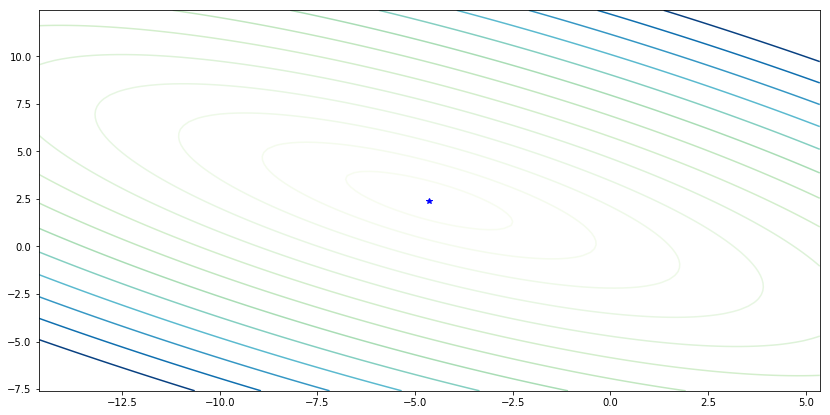

In [8]:
plot_it();

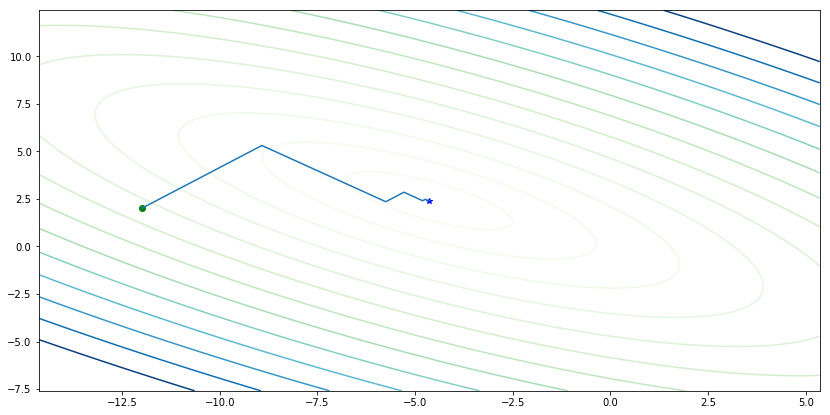

In [9]:
x_0 = [-12, 2]
xs, fs = grad_desc(x_0, f, grad, Q)
plt.show(plot_it(x_0, xs))
plt.close()

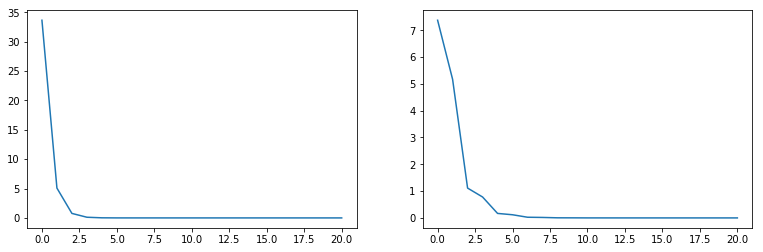

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,4))
ax1.plot(np.abs(f(x_star) - fs))
ax2.plot(np.linalg.norm(x_star - xs, axis=1))

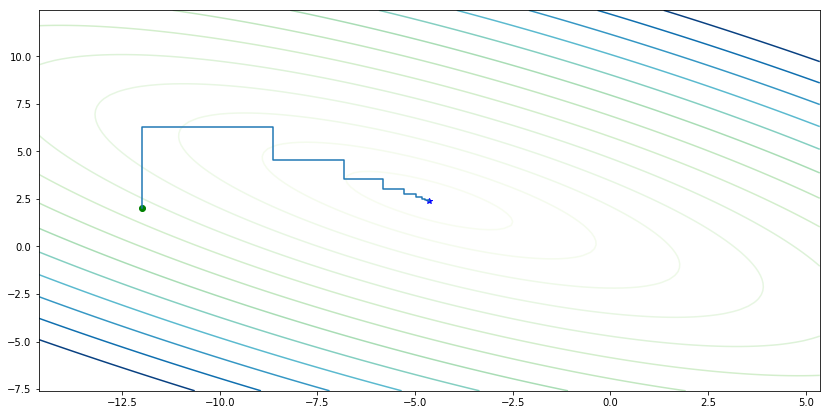

In [11]:
xs, fs = coord_desc(x_0, f, grad, Q,  iters=100)
p = plot_it(x_0, xs);

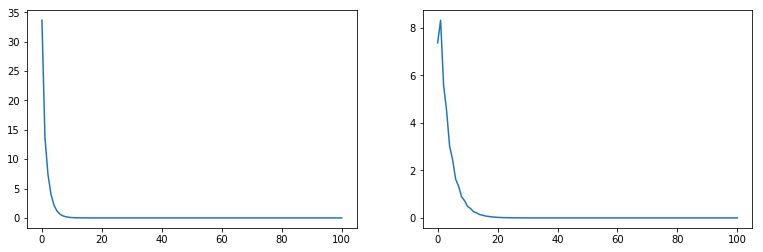

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,4))
ax1.plot(np.abs(f(x_star) - fs))
ax2.plot(np.linalg.norm(x_star - xs, axis=1))

In [40]:
y_min, y_max = p.gca().get_ylim()
x_min, x_max = p.gca().get_xlim()
line = [[x_min, x_max],
        [y_min + abs(y_max - y_min) * 0.2, y_min + abs(y_max - y_min) * 0.33]]

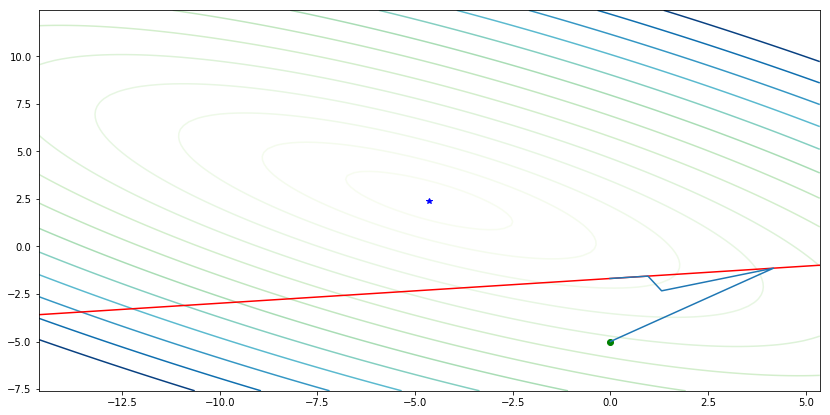

In [41]:
x_0 = [0, -5]
xs, fs = proj_desc(x_0, f, grad,line,  iters=120)
p = plot_it(x_0, xs, line=line)

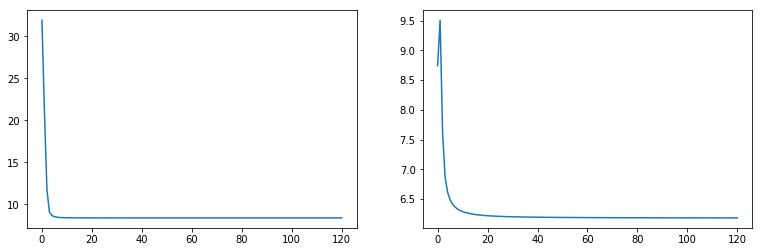

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,4))
ax1.plot(np.abs(f(x_star) - fs))
ax2.plot(np.linalg.norm(x_star - xs, axis=1))